# Desafio do Acelera Data Science 

**Autor: Erick Amorim**

**Criando um modelo de aprendizagem de máquina para prever a nota de matemática de quem participou do ENEM 2016**.

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação.

## Manipulação e Exploração dos Dados 

***Pacotes ou Bibliotecas usadas neste desafio.***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(10, 7)

sns.set()

**Leitura dos dados**

In [3]:
df = pd.read_csv("train.csv")
df_teste = pd.read_csv("test.csv")

In [4]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


__Veja que na base de dados de _treino_ `df` temos mais variáveis do que na base de dados de _teste_ `df_teste`. Vamos utilizar na base `df` as mesmas variáveis da base de teste `df_teste`, além da coluna `IN_TREINEIRO` que aqui será nossa variáveil resposta__

In [6]:
variaveis = df_teste.columns

In [7]:
variaveis

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [8]:
df = pd.concat( [ df[variaveis], df["IN_TREINEIRO"] ], axis = 1 )

In [9]:
df.head(7)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,...,620.0,E,E,C,B,B,A,NaN,A,0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,...,560.0,E,D,C,B,B,C,E,A,0


**Verificando a dimensão e a existencia de valores ausentes**

In [10]:
df.shape

(13730, 44)

In [11]:
aux = pd.DataFrame({'tipos': df.dtypes,
                    'participantes' : df.shape[0],
                    'ausentes' : df.isna().sum(),
                    'perc_ausentes' : df.isna().sum()/df.shape[0],
                    'valores_unicos': df.nunique()})

In [12]:
aux

,tipos,participantes,ausentes,perc_ausentes,valores_unicos
NU_INSCRICAO,object,13730,0,0.000000,13730
CO_UF_RESIDENCIA,int64,13730,0,0.000000,27
SG_UF_RESIDENCIA,object,13730,0,0.000000,27
NU_IDADE,int64,13730,0,0.000000,55
TP_SEXO,object,13730,0,0.000000,2
TP_COR_RACA,int64,13730,0,0.000000,6
TP_NACIONALIDADE,int64,13730,0,0.000000,5
TP_ST_CONCLUSAO,int64,13730,0,0.000000,4
TP_ANO_CONCLUIU,int64,13730,0,0.000000,11
TP_ESCOLA,int64,13730,0,0.000000,4


In [13]:
df.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

__Aqui não iremos trabalhar com todas as variáveis. Decidi utilizar as seguintes variáveis__

In [14]:
covariaveis = ['NU_IDADE','TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_BAIXA_VISAO', 'IN_SURDEZ',
       'IN_SABATISTA', 'IN_GESTANTE','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'IN_TREINEIRO']

In [15]:
df = df[covariaveis]

In [16]:
df.shape

(13730, 30)

In [17]:
df.head(7)

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_SURDEZ,IN_SABATISTA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,IN_TREINEIRO
0,24,M,1,1,1,4,1,0,0,0,...,80.0,520.0,D,D,C,A,A,C,A,0
1,17,F,3,1,2,0,2,0,0,0,...,80.0,580.0,A,A,B,A,A,A,A,0
2,21,F,3,1,3,0,1,0,0,0,...,NaN,NaN,D,D,C,A,A,A,A,0
3,25,F,0,1,1,9,1,0,0,0,...,NaN,NaN,H,E,E,C,B,C,D,0
4,28,M,2,1,1,4,1,0,0,0,...,NaN,NaN,E,D,C,A,A,B,A,0
5,18,F,1,1,1,1,1,0,0,0,...,100.0,620.0,E,E,C,B,B,A,A,0
6,18,F,3,1,2,0,2,0,0,0,...,100.0,560.0,E,D,C,B,B,C,A,0


In [18]:
aux = pd.DataFrame({'tipos': df.dtypes,
                    'participantes' : df.shape[0],
                    'ausentes' : df.isna().sum(),
                    'perc_ausentes' : df.isna().sum()/df.shape[0]})
aux

,tipos,participantes,ausentes,perc_ausentes
NU_IDADE,int64,13730,0,0.000000
TP_SEXO,object,13730,0,0.000000
TP_COR_RACA,int64,13730,0,0.000000
TP_NACIONALIDADE,int64,13730,0,0.000000
TP_ST_CONCLUSAO,int64,13730,0,0.000000
TP_ANO_CONCLUIU,int64,13730,0,0.000000
TP_ESCOLA,int64,13730,0,0.000000
IN_BAIXA_VISAO,int64,13730,0,0.000000
IN_SURDEZ,int64,13730,0,0.000000
IN_SABATISTA,int64,13730,0,0.000000


__Veja que existem 3597 participantes ausentes. Vamos substituir os valores destes indivíduos por zero, pois iremos considerar que estes participantes não compareceram para fazer as provas__

In [19]:
df.fillna(0, inplace=True)

In [20]:
aux = pd.DataFrame({'tipos': df.dtypes,
                    'participantes' : df.shape[0],
                    'ausentes' : df.isna().sum(),
                    'perc_ausentes' : df.isna().sum()/df.shape[0]})
aux

,tipos,participantes,ausentes,perc_ausentes
NU_IDADE,int64,13730,0,0.0
TP_SEXO,object,13730,0,0.0
TP_COR_RACA,int64,13730,0,0.0
TP_NACIONALIDADE,int64,13730,0,0.0
TP_ST_CONCLUSAO,int64,13730,0,0.0
TP_ANO_CONCLUIU,int64,13730,0,0.0
TP_ESCOLA,int64,13730,0,0.0
IN_BAIXA_VISAO,int64,13730,0,0.0
IN_SURDEZ,int64,13730,0,0.0
IN_SABATISTA,int64,13730,0,0.0


In [21]:
df["TP_SEXO"] = df["TP_SEXO"].astype("category")

In [22]:
df["TP_COR_RACA"] = df["TP_COR_RACA"].astype("category")

In [23]:
df["Q001"] = df["Q001"].astype("category")

In [24]:
df["sexo"] = df["TP_SEXO"].cat.codes

In [25]:
df["sexo"] = df["sexo"].astype("category")

In [26]:
df["TP_SEXO"]

0        M
1        F
2        F
3        F
4        M
        ..
13725    M
13726    F
13727    F
13728    M
13729    M
Name: TP_SEXO, Length: 13730, dtype: category
Categories (2, object): [F, M]

In [27]:
df["sexo"]

0        1
1        0
2        0
3        0
4        1
        ..
13725    1
13726    0
13727    0
13728    1
13729    1
Name: sexo, Length: 13730, dtype: category
Categories (2, int64): [0, 1]

In [28]:
df["TP_COR_RACA"]

0        1
1        3
2        3
3        0
4        2
        ..
13725    1
13726    3
13727    1
13728    3
13729    1
Name: TP_COR_RACA, Length: 13730, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

## Análise Exploratória de Dados

**Estatísticas descritivas**

*Note que a maioria dos participates são do sexo feminino* 

In [29]:
df["TP_SEXO"].value_counts(normalize=True).reset_index()

,index,TP_SEXO
0,F,0.618427
1,M,0.381573


In [30]:
df["IN_TREINEIRO"].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

### Idade dos participantes

*Observe que a média de idade dos participantes é de 21,59 anos. Veja que o participante mais novo que realizou as provas do ENEM tem 13 anos de idade, enquanto que o participante mais velho apresenta 67 anos.*

In [31]:
df["NU_IDADE"].describe().reset_index()

,index,NU_IDADE
0,count,13730.000000
1,mean,21.593809
2,std,7.043654
3,min,13.000000
4,25%,17.000000
5,50%,19.000000
6,75%,23.000000
7,max,67.000000


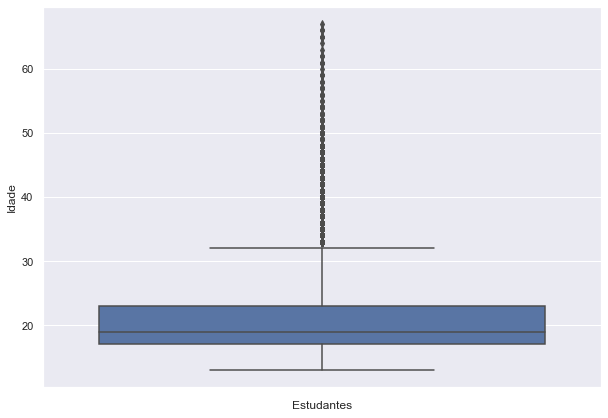

In [32]:
sns.boxplot(df["NU_IDADE"], orient = "v")
plt.ylabel('Idade')
plt.xlabel('Estudantes');

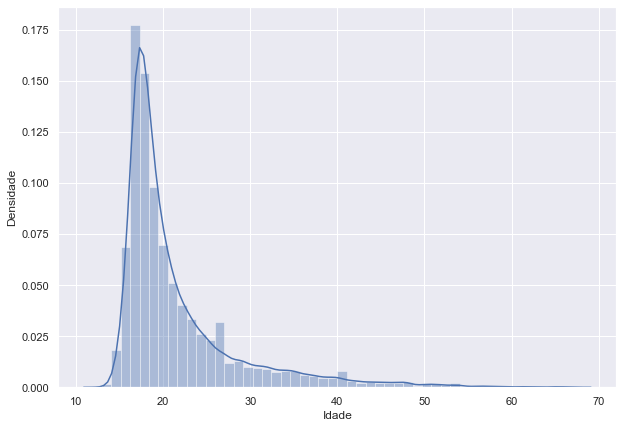

In [33]:
sns.distplot(df["NU_IDADE"])
plt.ylabel('Densidade');
plt.xlabel('Idade');

# Modelagem

In [34]:
(df.corr(method='spearman')['IN_TREINEIRO'] < -0.5)

NU_IDADE              True
TP_NACIONALIDADE     False
TP_ST_CONCLUSAO      False
TP_ANO_CONCLUIU      False
TP_ESCOLA            False
IN_BAIXA_VISAO       False
IN_SURDEZ            False
IN_SABATISTA         False
IN_GESTANTE          False
NU_NOTA_CN           False
NU_NOTA_CH           False
NU_NOTA_LC           False
TP_LINGUA            False
TP_STATUS_REDACAO    False
NU_NOTA_COMP1        False
NU_NOTA_COMP2        False
NU_NOTA_COMP3        False
NU_NOTA_COMP4        False
NU_NOTA_COMP5        False
NU_NOTA_REDACAO      False
IN_TREINEIRO         False
Name: IN_TREINEIRO, dtype: bool

In [35]:
(df.corr(method='spearman')['IN_TREINEIRO'] > 0.5)

NU_IDADE             False
TP_NACIONALIDADE     False
TP_ST_CONCLUSAO       True
TP_ANO_CONCLUIU      False
TP_ESCOLA            False
IN_BAIXA_VISAO       False
IN_SURDEZ            False
IN_SABATISTA         False
IN_GESTANTE          False
NU_NOTA_CN           False
NU_NOTA_CH           False
NU_NOTA_LC           False
TP_LINGUA            False
TP_STATUS_REDACAO    False
NU_NOTA_COMP1        False
NU_NOTA_COMP2        False
NU_NOTA_COMP3        False
NU_NOTA_COMP4        False
NU_NOTA_COMP5        False
NU_NOTA_REDACAO      False
IN_TREINEIRO          True
Name: IN_TREINEIRO, dtype: bool

In [36]:
(df.corr(method='spearman')['IN_TREINEIRO'] < -0.5).sort_values(ascending=False).head()

NU_IDADE             True
NU_NOTA_CN          False
TP_NACIONALIDADE    False
TP_ST_CONCLUSAO     False
TP_ANO_CONCLUIU     False
Name: IN_TREINEIRO, dtype: bool

In [37]:
(df.corr(method='spearman')['IN_TREINEIRO'] > 0.5).sort_values(ascending=False).head()

IN_TREINEIRO         True
TP_ST_CONCLUSAO      True
NU_NOTA_CN          False
TP_NACIONALIDADE    False
TP_ANO_CONCLUIU     False
Name: IN_TREINEIRO, dtype: bool

In [38]:
df["TP_ST_CONCLUSAO"].value_counts()

1    6524
2    4283
3    2306
4     617
Name: TP_ST_CONCLUSAO, dtype: int64

In [39]:
df.groupby('TP_ST_CONCLUSAO')['IN_TREINEIRO'].sum()

TP_ST_CONCLUSAO
1       0
2       0
3    1783
4       0
Name: IN_TREINEIRO, dtype: int64

## Definindo variáveis

In [40]:
df_teste.isna().sum().sort_values(ascending = False).head(14)

TP_DEPENDENCIA_ADM_ESC    3144
TP_ENSINO                 3144
Q027                      2437
NU_NOTA_COMP1             1170
NU_NOTA_COMP5             1170
TP_STATUS_REDACAO         1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_COMP4             1170
NU_NOTA_REDACAO           1170
NU_NOTA_LC                1170
NU_NOTA_CH                1112
NU_NOTA_CN                1112
TP_ESCOLA                    0
dtype: int64

In [41]:
df['idade_padronizada'] = (df['NU_IDADE'] - df['NU_IDADE'].mean())/ df['NU_IDADE'].std()
df_teste['idade_padronizada'] = (df_teste['NU_IDADE'] - df_teste['NU_IDADE'].mean())/ df_teste['NU_IDADE'].std()

In [42]:
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,idade_padronizada
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,E,E,H,B,B,C,D,A,-0.374815
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,B,C,B,A,A,C,D,A,0.361475
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,E,F,G,B,B,A,NaN,D,-0.816590
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,480.0,E,E,E,C,B,B,C,A,-0.669332
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,720.0,E,E,E,B,B,B,D,A,-0.374815


In [43]:
df["TP_ST_CONCLUSAO"]= df["TP_ST_CONCLUSAO"].astype("category")

In [44]:
df["TP_ST_CONCLUSAO"].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [45]:
df["IN_TREINEIRO"]= df["IN_TREINEIRO"].astype("category")

In [46]:
df["IN_TREINEIRO"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [47]:
variaveis_x = df[['idade_padronizada','TP_ST_CONCLUSAO']]
variavel_y = df["IN_TREINEIRO"]

In [48]:
#para testar o modelo:
X_treino, X_val, y_treino, y_val = train_test_split(variaveis_x, variavel_y, test_size=0.25, random_state=10)

In [49]:
print(X_treino.shape, X_val.shape, y_treino.shape, y_val.shape)

(10297, 2) (3433, 2) (10297,) (3433,)


In [50]:
# para fazer a previsão:
X_teste = df_teste[['idade_padronizada','TP_ST_CONCLUSAO']]

In [51]:
X_teste.head(7)

,idade_padronizada,TP_ST_CONCLUSAO
0,-0.374815,1
1,0.361475,1
2,-0.816590,3
3,-0.669332,2
4,-0.374815,1
5,-0.522073,2
6,-0.816590,3


## Floresta Aleatória

In [52]:
#testando ou ajustando o modelo
rf = RandomForestRegressor()
rf.fit(X_treino, y_treino)

RandomForestRegressor()

In [53]:
y_pred = rf.predict(X_val)

In [54]:
mae=metrics.mean_absolute_error(y_val, y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae,rmse)

0.005617742331220555 0.057292496569650554


In [55]:
#fazendo a previsão
y_pred = rf.predict(X_teste)

In [56]:
answer = pd.DataFrame({'NU_INSCRICAO':df_teste["NU_INSCRICAO"],
                        'IN_TREINEIRO':y_pred})


In [57]:
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0.0
1,177f281c68fa032aedbd842a745da68490926cd2,0.0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1.0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0.0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0.0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0.0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0.0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0.0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0.0


In [58]:
answer.to_csv('answer.csv', index=False)

## Regressão Logística

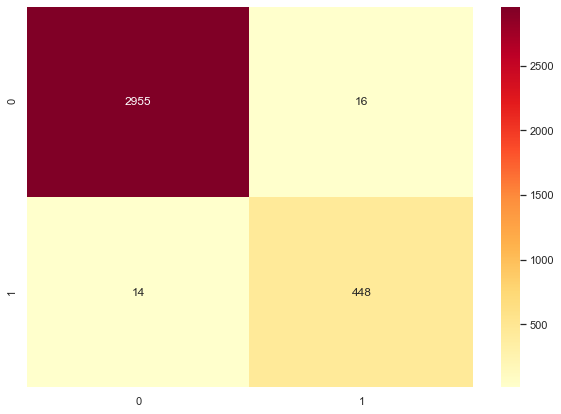

In [59]:
#testando o modelo
reg_log = LogisticRegression()
reg_log.fit(X_treino, y_treino)
y_pred = reg_log.predict(X_val)

sns.heatmap(confusion_matrix(y_val, y_pred),annot=True, cmap="YlOrRd" ,fmt='g');

In [60]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.9912612875036412
Precision: 0.9655172413793104
Recall: 0.9696969696969697


In [61]:
#fazendo a previsão
y_pred = reg_log.predict(X_teste)

In [62]:
answer = pd.DataFrame({'NU_INSCRICAO':df_teste["NU_INSCRICAO"],
                       'IN_TREINEIRO':y_pred})


In [63]:
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [64]:
answer.to_csv('answer_reglog.csv', index=False)